# Deep Face Mini Project

## Libraries and input

In [1]:
import dlib
import cv2
import matplotlib.pyplot as plt
import numpy

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

## find points in image

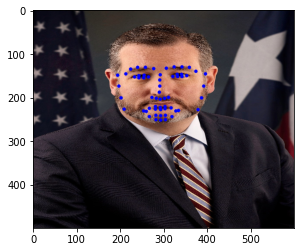

In [2]:
o_image = cv2.imread("Ted_Cruz_senatorial_portrait.jpg")
o_image = cv2.resize(o_image, (600, 500))
image = o_image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect the faces
rects = detector(gray)

for rect in rects:
    # extract the coordinates of the bounding box
    x1 = rect.left()
    y1 = rect.top()
    x2 = rect.right()
    y2 = rect.bottom()

    # cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)

    # apply the shape predictor to the face ROI
    shape = predictor(gray, rect)

points = []
for n in range(0, 68):
    if n in [12,11,10,9,8,7,6,5,4]:
        continue
    x = shape.part(n).x
    y = shape.part(n).y
    points.append([x,y])
    cv2.circle(image, (x, y), 4, (255, 0, 0), -1)
# print(numpy.array(points))
plt.imshow(image[...,::-1])

## Draw convex hull

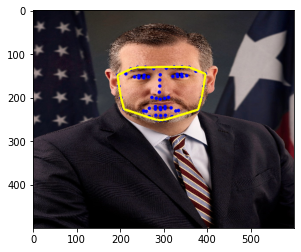

In [3]:
hull = cv2.convexHull(numpy.array(points))
cv2.drawContours(image, [hull], -1, (0,255,255), 4)
plt.imshow(image[...,::-1])

## create mask

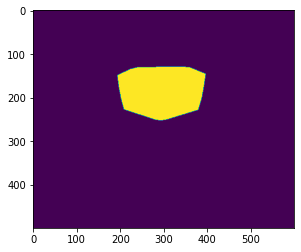

In [4]:
mask = numpy.zeros(image.shape[:2], dtype="uint8")
mask = cv2.fillConvexPoly(mask, hull, (255,255,255))
plt.imshow(mask)

## Cut mask 

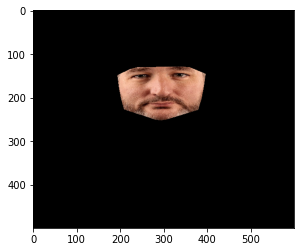

In [5]:
masked = cv2.bitwise_and(o_image,o_image,mask=mask)
plt.imshow(masked[...,::-1])

## find center point in new image

In [6]:
o_image = cv2.imread("Hillary_Clinton_official_Secretary_of_State_portrait_crop.jpg")
o_image = cv2.resize(o_image, (600, 500))
image = o_image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect the faces
rects = detector(gray)

for rect in rects:
    # extract the coordinates of the bounding box
    x1 = rect.left()
    y1 = rect.top()
    x2 = rect.right()
    y2 = rect.bottom()

    # cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)

    # apply the shape predictor to the face ROI
    shape = predictor(gray, rect)

points = []
for n in range(0, 30):
    x = shape.part(n).x
    y = shape.part(n).y
    points.append([x,y])
    cv2.circle(image, (x, y), 4, (255, 0, 0), -1)

center = (points[-1][0], points[-1][1])


## clone and create new face

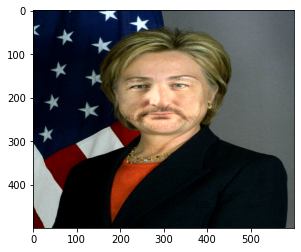

In [7]:
output = cv2.seamlessClone(masked, o_image, mask, center, cv2.NORMAL_CLONE)
plt.imshow(output[...,::-1])